
 
 [[ 0.46551125  0.20831427  0.58461456  0.63097564]
 [ 0.50069297 -0.4712601  -0.62664449  0.36679306]
 [ 0.69138763 -0.08710118  0.21797864 -0.68328752]
 [-0.23364283 -0.85260335  0.46693448  0.02123079]] 
 


 
 [3.26454421 0.25707152 0.0657663  0.0034163 ] 
 


 
 [3.26454421 0.25707152 0.0657663  0.0034163 ] 
 


 
 [[-0.46551125 -0.20831427 -0.58461456 -0.63097564]
 [ 0.50069297 -0.4712601  -0.62664449  0.36679306]
 [-0.69138763  0.08710118 -0.21797864  0.68328752]
 [-0.23364283 -0.85260335  0.46693448  0.02123079]] 
 



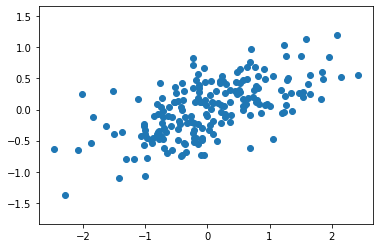

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig


def cov_mat(X):
    
    n = X.shape[0]

    cov_matrix  = (1/(n-1))*(X-X.mean(axis=0)).T.dot(X - X.mean(axis=0))

    cov_matrix = np.array(cov_matrix)

    return cov_matrix


class myPCA():

    def __init__(self,n_component ):
        self.n_component = n_component

    def fit(self,X):
        
        
        cov_matrix = cov_mat(X)

        self.eigen_val, self.eigen_vec = np.linalg.eig(cov_matrix)

        self.idx = self.eigen_val.argsort()[::-1]
        self.eigen_val = self.eigen_val[self.idx][:self.n_component]
        
        self.eigen_vec = (self.eigen_vec[:,self.idx])[:, :self.n_component].T

    
    def transform(self,X):
        return X.dot(self.eigen_vec)



#sample data set to run and implement MyPCA
rng = np.random.RandomState(1)
X = np.dot(rng.rand(4, 4), rng.randn(4, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

pca = myPCA(n_component=4)
pca.fit(X)
      
print("\n","\n",pca.eigen_vec,"\n","\n")

print("\n","\n",pca.eigen_val,"\n","\n")

bv=pca.transform(X)


#Actual Pca to compare and check results
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X)

print("\n","\n",pca.explained_variance_,"\n","\n")
print("\n","\n",pca.components_,"\n","\n",)
zxc=pca.transform(X)

